<a href="https://colab.research.google.com/github/AdrianduPlessis/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/LS_DS_Uni_4_Sprint_3_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on SageMaker, Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [3]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [4]:
max_features = 2000
maxlen = 80
batch_size = 32

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8982 samples, validate on 2246 samples
2246/2246 [==============================] - 5s 2ms/sample - loss: nan - acc: 0.0396
Test score: nan
Test accuracy: 0.039626002


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Ensures that all sequences are the same length ether by appending(padding) a 'value' at the end or by truncating a longer sequence.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Traditional RNNs are heavily biased toward more recent observations in a sequence, we use LSTMs to keep the effect of older observations from going to zero.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Please add your answer in markdown here.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [6]:
!pip install google_images_download

In [7]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 200, "print_urls": True, "chromedriver": "/usr/local/bin/chromedriver"}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Looks like we cannot locate the path the 'chromedriver' (use the '--chromedriver' argument to specify the path to the executable.) or google chrome browser is not installed on your machine (exception: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home
)


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [0]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    types_of_frogs = ['bullfrog', 'tree frog', 'tailed frog']
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    for entry in results:
        if entry[1] in types_of_frogs:
            return True
    return False

In [0]:
import os
images = []
directory = 'downloads/lilly frog pond'
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
       images.append(filename)

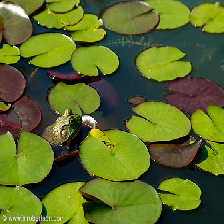

In [12]:
process_img_path('downloads/lilly frog pond/Design 1.jpg')

In [19]:
for each_image in images:
   print(f'{each_image} contains a frog:',img_contains_frog(process_img_path(f'downloads/lilly frog pond/{each_image}'))) 

3bc4c03f6d425ddf5f7664d9a9ffc546.jpg contains a frog: False
Ponds5.jpg contains a frog: False
bull-frog-green-pond-lily-pad.jpg contains a frog: True
Design 1.jpg contains a frog: True


#### Stretch Goal: Displaying Predictions

In [0]:
import matplotlib.pyplot as plt



<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ Auto encoders work for any type of compression problem. If for example you have a situation where you have massive ammounts of data coming in (think autonomous driving fleet)it would be worth while to run that data through an auto encoder in order to store and opperate on the data more efficiently. 

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?  
My strongest area, as a data scientist, is data cleaning. More than just encoding, it's understanding what is relevant to the given proplem.
- What area of Data Science would you most like to learn more about, and why?  
I would most like to learn more about NNs, because it's the closest thing to magic I've ever come across and the more I understand ML/AI the more I understand myself and others. Since starting this unit, I've been facinated by the idea of studying early childhood development. How do you optimally 'train' an infant for happyness, fulfillment, etc.?
- Where do you think Data Science will be in 5 years?  
It's been interesting to learn how young some of the tools that are now ubiquitous in the field are. With the cost of compute power consistantly declining and tools becoming continuously more accessable, I think more and more data aquisition, preparation and interpretation will become the bottlenecks of the industry.
- What are the threats posed by AI to our society?
To some extent I think this question is flawed. There is a bit of Theseus's paradox at play here. What part of 'our society' is it that we should be protective of? Human life? Well a hypothetical advanced intelegence can cage us like rats and ensure our average life expectancy goes up by a decade. Is Human Happines the metric by which to measure the advantage of AI to 'our society'? I'm visualizing 80% of all humans unconcious in hospital beds with AI monitoring and administering dopamine at optimal levels to ensure that the mean happiness of our species is higher than ever. I think any metric of societal progress has a destopian interpretation. We cannot preserve and progress simultaneously. The biggest imminent and realisitc danger that I think Data Science poses to our society is exasperating the inequality issue. I worry, to lean on the magic metaphor, eventually the wizards and muggles will come to see each other as 'other' and therefor forget about their ethical obligations to one another. 
- How do you think we can counteract those threats? 
The closest thing to a solution to this problem that I can think of is to inform as many people as possible about the the powers and limitations of data science.
- Do you think achieving General Artifical Intelligence is ever possible?
Acknowladging that I don't know what I don't know: Yes, I think AGI is a probabilistic inevitability. I wonder whether it is only a matter of icreasing the number of transistors. Does a human have one lifetime of 'training' or are we born with some non-random initial weights which are the product of thousands of years of 'training' and selection? Would AGI have to have more/faster nodes/layers in order to catch up or exceed human intelegence? It's interesting because in this case we get to set the parameters of the selection. Makes you wonder about the 'parameters' of our 'selection'. No single node could possibly comprehend the purpose of a NN, does that mean our 'place in the universe' is implicitly intractable or does it just mean that it's time for me to go to bed? Imagine for a moment that we, collectivly, are the super intelegent overlord over our own original creator(s). Time for bed.


A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")